In [ ]:
import math
import pandas as pd
import plotly
import pickle
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.tools import FigureFactory as FF
import pylab as pl
import statsmodels.api as sm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
import scipy
import scipy.stats as sp
import numpy as np
from statsmodels.distributions.empirical_distribution import ECDF
plotly.tools.set_credentials_file(username='DrewFrost', api_key='sLdSbThSohcRX6Mnf63L')

dataG = pd.read_csv('data/gol11.csv', sep='\s+')
#ПРИЙМАЄМО ЗНАЧЕННЯ ГОЛОСІЇВСЬКОГО РАЙОНУ
df1 = pd.DataFrame(dataG)
#ПЕРЕВОДИМО ЗНАЧЕННЯ В ТАБЛИЧНУ СТУКТУРУ ДАННИХ
mn1 = df1.mean()[0]
#ЗНАХОДИМО СЕРЕДНЕ ЗНАЧЕННЯ ПО ГОЛОСІЇВСЬКОМУ РАЙОНУ
print('Середне значення по Голосіївському району: {}'.format(mn1))
dataS = pd.read_csv('data/svyat11.csv', sep='\s+')
#ПРИЙМАЄМО ЗНАЧЕННЯ ГОЛОСІЇВСЬКОГО РАЙОНУ
df2 = pd.DataFrame(dataS)
mn2 = df2.mean()[0]
#ЗНАХОДИМО СЕРЕДНЕ ЗНАЧЕННЯ ПО ГОЛОСІЇВСЬКОМУ РАЙОНУ
print('Середне значення по Святошинському району: {}'.format(mn2))


x = np.linspace(0, 30, 100)
#ВИЗНАЧАЄМО МАКСИМАЛЬНЕ ТА МІНІМАЛЬНЕ ЗНАЧЕННЯ ПО Х
#ТА КІЛЬКІСТЬ ТОЧОК ВІДОБРАЖЕННЯ У ПОБУДОВІ КРИВОЇ
y1 = scipy.stats.norm.pdf(x, loc=mn1)
#ВИЗНАЧАЄМО ЗНАЧЕННЯ КРИВОЇ ГОЛОСІЇВСЬКОГО РАЙОНУ
y2 = scipy.stats.norm.pdf(x, loc=mn2)
#ВИЗНАЧАЄМО ЗНАЧЕННЯ КРИВОЇ СВЯТОШИНСЬКОГО  РАЙОНУ
#ВВОДИМО АТРИБУТИ ПЕРШОЇ КРИВОЇ
trace1 = go.Scatter(
    x = x,
    y = y1,
    mode = 'lines+markers',
    name='Нормальний розподіл результатів 11 класу Голосіївського району'
)
#ВВОДИМО АТРИБУТИ ДРУГОЇ КРИВОЇ
trace2 = go.Scatter(
    x = x,
    y = y2,
    mode = 'lines+markers',
    name='Нормальний розподіл 11 класу Святошинського району'
)

data = [trace1, trace2]

py.iplot(data, filename='normal-dists-plot')










In [ ]:
#ПРОВОДИМО t-test ДЛЯ ЗНАЧЕНЬ ГОЛОСІЇВСЬКОГО ТА СВЯТОШИНСЬКОГО РАЙОНУ
twosample_results = scipy.stats.ttest_ind(df1, df2)
#ВИЗНАЧАЄМО АТРИБУТИ ТАБЛИЦІ
matrix_twosample = [
    ['', 'Пропорція різниці між двома групами', 'Рівень значимості'],
    ['Значення', twosample_results[0], twosample_results[1]]
]
#БУДУЄМО ТАБЛИЦЮ З ОТРИМАНИМИ ЗНАЧЕННЯМИ ТА АТРИБУТАМИ
twosample_table = FF.create_table(matrix_twosample, index=True)
py.iplot(twosample_table, filename='twosample-table')


In [ ]:
print('Дисперсія 11 класу Голосіївського району: {}'.format(np.var(df1)[0]))
print('Дисперсія 11 класу Святошинського району: {}'.format(np.var(df2)[0]))

In [16]:
#ЗЧИТУЄМО ТАБЛИЦЮ З УСІМА ЗНАЧЕННЯ БАЛІВ ЗА 11 КЛАС
dataA = pd.read_csv('data/All.csv', sep='\s+')
dfa = pd.DataFrame(dataA)
mn3 = dfa.mean()[0]
print('Середне значення по 11 класу з районів участників: {}'.format(mn3))

Середне значення по 11 класу з районів участників: 9.300653594771243


In [ ]:
x = np.linspace(0,30, 100)
y1 = scipy.stats.norm.pdf(x, loc=mn3)
#ВИЗНАЧАЄМО ЗНАЧЕННЯ КРИВОЇ З УСІХ РАЙОНІВ
y2 = scipy.stats.norm.pdf(x, loc=mn1)
#ВИЗНАЧАЄМО ЗНАЧЕННЯ КРИВОЇ ГОЛОСІЇВСЬКОГО РАЙОНУ  РАЙОНУ
trace3 = go.Scatter(
    x = x,
    y = y1,
    mode = 'lines+markers',
    name='Нормальний розподіл результатів 11 класу з усіх районів'
)
trace4 = go.Scatter(
    x = x,
    y = y2,
    mode = 'lines+markers',
    name='Нормальний розподіл 11 класу Голосіївського району'
)
data = [trace3, trace4]
py.iplot(data, filename='normal-dists-plot-all1')


In [ ]:
#ПРОВОДИМО t-test ДЛЯ ЗНАЧЕНЬ 
twosample_results = scipy.stats.ttest_ind(dfa, df1)
matrix_twosample = [
    ['', 'Пропорція різниці між двома групами', 'Рівень значимості'],
    ['Значення', twosample_results[0], twosample_results[1]]
]

twosample_table = FF.create_table(matrix_twosample, index=True)
py.iplot(twosample_table, filename='twosample-table')

In [ ]:
twosample_results = scipy.stats.ttest_ind(dfa, df2)
matrix_twosample = [
    ['', 'Пропорція різниці між двома групами', 'Рівень значимості'],
    ['Значення', twosample_results[0], twosample_results[1]]
]

twosample_table = FF.create_table(matrix_twosample, index=True)
py.iplot(twosample_table, filename='twosample-table')

In [ ]:
print('Дисперсія 11 класу з усіх районі: {}'.format(np.var(dfa)[0]))

In [ ]:
x = np.linspace(0, 40, 100)
#ВИЗНАЧАЄМО МАКСИМАЛЬНЕ ТА МІНІМАЛЬНЕ ЗНАЧЕННЯ ПО Х
#ТА КІЛЬКІСТЬ ТОЧОК ВІДОБРАЖЕННЯ У ПОБУДОВІ КРИВОЇ
y1 = scipy.stats.norm.pdf(x, loc=mn3)
#ВИЗНАЧАЄМО ЗНАЧЕННЯ КРИВОЇ З УСІХ РАЙОНІВ
y2 = scipy.stats.norm.pdf(x, loc=mn2)
#ВИЗНАЧАЄМО ЗНАЧЕННЯ КРИВОЇ СВЯТОШИНСЬКОГО РАЙОНУ  РАЙОНУ
trace3 = go.Scatter(
    x = x,
    y = y1,
    mode = 'lines+markers',
    name='Нормальний розподіл результатів 11 класу з усіх районів'
)

trace4 = go.Scatter(
    x = x,
    y = y2,
    mode = 'lines+markers',
    name='Нормальний розподіл 11 класу Святошинського району'
)

data = [trace3, trace4]

py.iplot(data, filename='normal-dists-plot-all1')

In [17]:
def Ftest_pvalue_rpy2(d1,d2):
    """docstring for Ftest_pvalue_rpy2"""
    rd1 = (robjects.FloatVector(d1))
    rd2 = (robjects.FloatVector(d2))
    rvtest = robjects.r['var.test']
    return rvtest(rd1,rd2)[2][0]
    

In [18]:
def fisher_criterion(v1, v2):
    return abs(np.mean(v1) - np.mean(v2)) / (np.var(v1) + np.var(v2))
fisher_criterion(df1,df2)

Values    0.080121
dtype: float64

In [19]:
print('Дисперсія 11 класу Голосіївського району: {}'.format(np.var(df1)[0]))
print('Дисперсія 11 класу Святошинського району: {}'.format(np.var(df2)[0]))
print('Дисперсія 11 класу з усіх районів: {}'.format(np.var(dfa)[0]))

Дисперсія 11 класу Голосіївського району: 24.635160680529303
Дисперсія 11 класу Святошинського району: 25.9305785123967
Дисперсія 11 класу з усіх районів: 37.700457089153744


In [21]:
#ПЕРЕВОДИМО ІНФОРМАЦІЮ В МАСИВ ПОТРІБНОГО ТИПУ
arr1= np.array(df1)
arr2= np.array(df2)
arr3= np.array(dfa)
#ЗАПИСУЄМО ЗНАЧЕННЯ В ОКРЕМІ ЗМІННІ
y0 = arr1
y1 = arr2
y2 = arr3
#БУДУЄМО КОРОБКОВІ ГРАФІКИ ПО ЗНАЧЕННЯМ
trace0 = go.Box(
    y=y0,
    name = "Голосіївський район"
)
trace1 = go.Box(
    y=y1,
    name = "Святошинський район"
)
trace2 = go.Box(
    y=y2,
    name = "З усіх районів"
)
#ВИВОДИМО ПОТРІБНІ КОРОБКОВІ ГРАФІКИ
data = [trace0, trace1, trace2]
py.iplot(data)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [25]:
#ЗАПИСУЄМО ЗНАЧЕННЯ В ЗМІНІ
x0=arr1
x1=arr2
x2=arr3
#БУДУЄМО ГІСТОГРАМИ
trace0 = go.Histogram(
    x=x0,
    opacity=0.75,
    name="Голосіїівський"
)
trace1 = go.Histogram(
    x=x1,
    opacity=0.75,
    name = "Святошинський"
)
trace2 = go.Histogram(
    x=x2,
    opacity=0.75,
    name = "Всі райони"  
)
#ВИВОДИМО ГІСТРОГРАМИ
data = [trace0, trace1, trace2]
layout = go.Layout(barmode='stack')
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='stacked histogram')

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



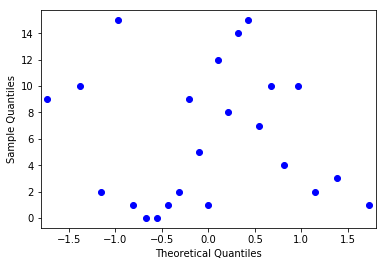

In [26]:
sm.qqplot(df1)
plt.show()

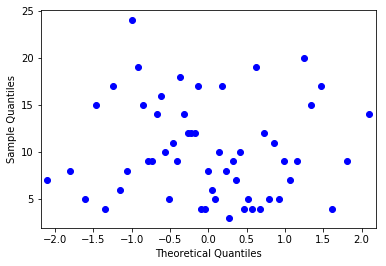

In [27]:
sm.qqplot(df2)
plt.show()

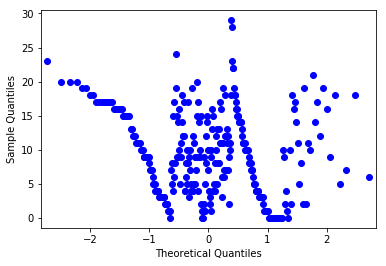

In [29]:
sm.qqplot(dfa)
plt.show()